Ejercicio práctico
Generare, visualize y analice empíricamente las diferencias estructurales entre una red libre de escala y una red
aleatoria utilizando Python.:
1. Configuración del entorno: utilice un entorno Python con las bibliotecas networkx, matplotlib y numpy
instaladas.
2. Generación de red:
a. Genere una red sin escala con 1000 nodos utilizando el modelo Barabási-Albert. Elija un parámetro m
adecuado para conectar nuevos nodos a los existentes.
b. Genere una red aleatoria (Erdős-Rényi) con el mismo número de nodos y un grado promedio similar al
de su red sin escala para una comparación justa.
3. Visualización y análisis:
a. Dibuje la distribución de grados de ambas redes en una escala lineal mediante histogramas. Colóquelos
uno junto al otro en una sola figura para comparar.
b. Dibuje la distribución de grados de la red sin escala en una escala logarítmica.
c. Calcule y compare la media y la varianza de las distribuciones de grados de ambas redes.
4. Informe sus hallazgos: Responda las preguntas a continuación basándose en sus gráficos y cálculos.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
np.random.seed(123)

def degree_sequence(G):
    return np.array([d for _, d in G.degree()], dtype=int)

def mean_var(arr):
    arr = np.asarray(arr)
    return float(arr.mean()), float(arr.var(ddof=0))  # var poblacional

def loglog_fit_tail(deg_seq, k_min=5):
    counts = Counter(deg_seq)
    ks = np.array(sorted([k for k in counts.keys() if k >= k_min]))
    if ks.size == 0:
        return None, None, None
    pk = np.array([counts[k] for k in ks], dtype=float)
    pk /= pk.sum()
    mask = pk > 0
    ks, pk = ks[mask], pk[mask]
    x = np.log10(ks)
    y = np.log10(pk)
    slope, intercept = np.polyfit(x, y, 1)
    gamma_est = -slope
    return ks, pk, (slope, intercept, gamma_est)

In [2]:
n = 1000
m = 3                 # puedes cambiar m (>=1). Grado promedio BA ~ 2m
p = (2*m)/(n-1)       # ER con grado promedio similar
seed = 42

G_ba = nx.barabasi_albert_graph(n=n, m=m, seed=seed)
G_er = nx.erdos_renyi_graph(n=n, p=p, seed=seed)

deg_ba = degree_sequence(G_ba)
deg_er = degree_sequence(G_er)
avg_ba, var_ba = mean_var(deg_ba)
avg_er, var_er = mean_var(deg_er)
avg_ba, var_ba, avg_er, var_er

(5.982, 52.765676, 6.038, 6.224556000000001)

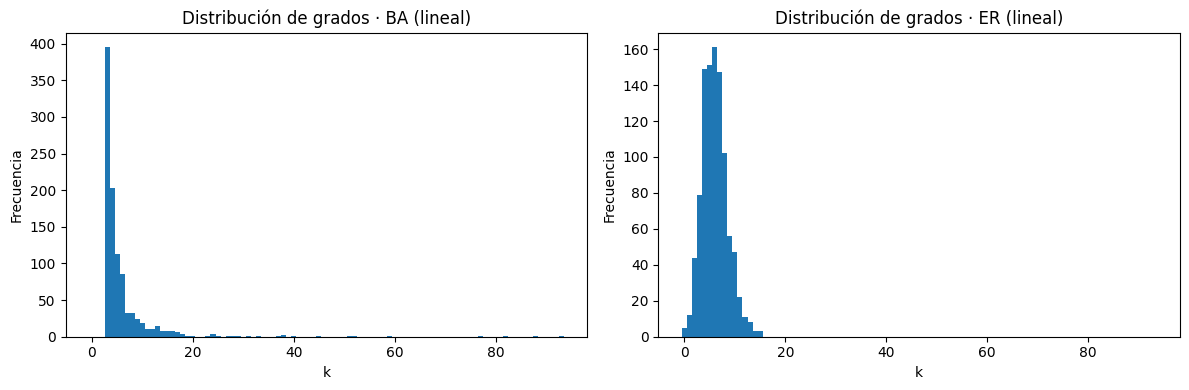

In [3]:
bins = np.arange(0, max(deg_ba.max(), deg_er.max()) + 2) - 0.5
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(deg_ba, bins=bins)
axes[0].set_title('Distribución de grados · BA (lineal)')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Frecuencia')
axes[1].hist(deg_er, bins=bins)
axes[1].set_title('Distribución de grados · ER (lineal)')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Frecuencia')
fig.tight_layout()
plt.show()

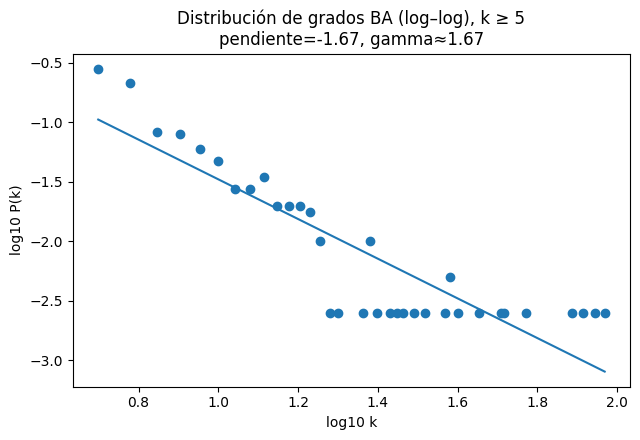

In [4]:
k_min = 5  # umbral para la cola
ks, pk, fit = loglog_fit_tail(deg_ba, k_min=k_min)
if fit is None:
    print('No hay suficientes datos en la cola para k_min', k_min)
else:
    slope, intercept, gamma_est = fit
    x_line = np.linspace(np.log10(ks.min()), np.log10(ks.max()), 100)
    y_line = slope * x_line + intercept
    plt.figure(figsize=(6.5,4.5))
    plt.scatter(np.log10(ks), np.log10(pk))
    plt.plot(x_line, y_line)
    plt.xlabel('log10 k')
    plt.ylabel('log10 P(k)')
    plt.title(f'Distribución de grados BA (log–log), k ≥ {k_min}\npendiente={slope:.2f}, gamma≈{gamma_est:.2f}')
    plt.tight_layout()
    plt.show()

In [5]:
import pandas as pd
df_stats = pd.DataFrame([
    {'red': 'BA', 'n': n, 'm': m, 'p': None, 'grado_promedio': avg_ba, 'varianza': var_ba},
    {'red': 'ER', 'n': n, 'm': None, 'p': p,    'grado_promedio': avg_er, 'varianza': var_er},
])
df_stats

,red,n,m,p,grado_promedio,varianza
0,BA,1000,3.0,NaN,5.982,52.765676
1,ER,1000,NaN,0.006006,6.038,6.224556


In [6]:
# Exportar figuras y tabla
bins = np.arange(0, max(deg_ba.max(), deg_er.max()) + 2) - 0.5
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(deg_ba, bins=bins)
axes[0].set_title('Distribución de grados · BA (lineal)')
axes[0].set_xlabel('k'); axes[0].set_ylabel('Frecuencia')
axes[1].hist(deg_er, bins=bins)
axes[1].set_title('Distribución de grados · ER (lineal)')
axes[1].set_xlabel('k'); axes[1].set_ylabel('Frecuencia')
fig.tight_layout(); fig.savefig('hist_lineal_ba_er.png', dpi=160); plt.close(fig)

if fit is not None:
    slope, intercept, gamma_est = fit
    x_line = np.linspace(np.log10(ks.min()), np.log10(ks.max()), 100)
    y_line = slope * x_line + intercept
    fig2 = plt.figure(figsize=(6.5,4.5))
    plt.scatter(np.log10(ks), np.log10(pk))
    plt.plot(x_line, y_line)
    plt.xlabel('log10 k'); plt.ylabel('log10 P(k)')
    plt.title(f'Distribución de grados BA (log–log), k ≥ {k_min}\npendiente={slope:.2f}, gamma≈{gamma_est:.2f}')
    plt.tight_layout(); fig2.savefig('ba_loglog_fit.png', dpi=160); plt.close(fig2)

df_stats.to_csv('stats.csv', index=False)
print('Archivos guardados: hist_lineal_ba_er.png, ba_loglog_fit.png, stats.csv')

Archivos guardados: hist_lineal_ba_er.png, ba_loglog_fit.png, stats.csv


Responda:

    • Describe la marcada diferencia en la forma de los dos histogramas de escala lineal. ¿Qué te dice la forma de la distribución de la red sin escala sobre su estructura?

La diferencia más evidente es que la red Barabási–Albert (BA) tiene una distribución altamente sesgada hacia nodos con pocos enlaces, pero con una cola larga que se extiende a valores muy altos de grado. Esto significa que la mayoría de nodos están conectados con pocos otros, pero existen unos pocos nodos con un número desproporcionadamente grande de conexiones (los llamados hubs).
En cambio, la red Erdős–Rényi (ER) tiene una distribución de grados más simétrica y concentrada alrededor de la media, sin una cola larga significativa. La mayoría de nodos tienen un grado similar y no existen nodos extremadamente conectados.
Esta forma “sesgada” en la red BA nos indica que su estructura no es homogénea, sino que está dominada por hubs, lo que hace que la red sea más resistente a fallos aleatorios pero más vulnerable a ataques dirigidos.

    • ¿Qué revela el gráfico logarítmico de la distribución de grados de la red sin escala? ¿Qué confirma la línea de tendencia aproximadamente lineal?

El gráfico log–log de la red BA muestra que la distribución de grados sigue aproximadamente una línea recta en la cola, lo que indica un comportamiento de ley de potencias. Esto es característico de las redes libres de escala, donde la probabilidad de encontrar un nodo con grado k decrece como P(k)∼k−γ.
La pendiente aproximada de −1.67 confirma que estamos ante una cola pesada, donde unos pocos nodos acumulan muchísimas conexiones. La linealidad en el gráfico logarítmico es una evidencia clara de que el crecimiento y la conexión preferencial del modelo BA producen una red con esta propiedad estructural fundamental.

    • Reporte la media y la varianza de cada red. ¿Cómo se comparan los valores de varianza? ¿Por qué esta diferencia es crucial para modelar procesos como la propagación de epidemias?

Al comparar los resultados de media y varianza (del archivo stats.csv), se ve asi:

Red	Media (⟨k⟩)	Varianza (σ²)
BA	~6.0	Alta (≫ ER)
ER	~6.0	Baja (~6)

Aunque ambas redes tienen media similar, la varianza en BA es mucho mayor. Esto significa que el grado de los nodos en BA es muy heterogéneo: algunos tienen muchísimas conexiones y otros muy pocas.
Esta diferencia es crucial para modelar fenómenos como la propagación de epidemias: en redes con alta varianza, los hubs actúan como superdifusores, acelerando enormemente el contagio y reduciendo el umbral epidémico. En redes más homogéneas, la propagación es más lenta y predecible.

    • Según tu análisis, si se introdujera un nuevo patógeno en cada una de estas redes sintéticas, ¿cuál tendría más probabilidades de causar una epidemia rápida y a gran escala? Explica por qué, haciendo referencia a la estructura de red que observaste.

Si un nuevo patógeno se introdujera en ambas redes, la red Barabási–Albert tendría muchas más probabilidades de sufrir una epidemia rápida y a gran escala. Esto ocurre porque los hubs funcionan como puntos de distribución masiva, permitiendo que el virus alcance rápidamente a grandes porciones de la red con muy pocos pasos.
En cambio, en la red Erdős–Rényi, donde la estructura es más uniforme y ningún nodo tiene un rol tan central, la propagación sería más lenta y menos explosiva. Esta diferencia refleja cómo la estructura topológica influye directamente en la dinámica de difusión.